# AIM: CLASSIFY DRUGS

STEPS:
* 1)EXPLORATORY DATA-ANALYSIS
* 2)FEATURE SELECTION
* 3)FEATURE SCALING
* 4)MODEL BUILDING



# MODEL SUMMARY

* DECISION TREE-100% ACCURATE ON TEST SET 
* NAIVE BAYES-100% ACCURATE ON TEST SET 
* RANDOM FOREST-100% ACCURATE ON TEST SE

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [2]:
df = pd.read_csv("../input/drug-classification/drug200.csv")

# EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING

In [3]:
#check first 5 head
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
#check bottom 5
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
#check number of rows n columns
df.shape

(200, 6)

In [7]:
#check some stat for numerical var
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
#chech for null value
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
#check for datatypes
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [10]:
#get numerical variables
num_vars=[var for var in df.columns if df[var].dtypes!='O']
num_vars

['Age', 'Na_to_K']

In [11]:
#get categorical variables
cat_vars=[var for var in df.columns if df[var].dtypes=='O']
cat_vars

['Sex', 'BP', 'Cholesterol', 'Drug']

In [12]:
#lets check unique labels in each category
for var in cat_vars:
    print(df[var].unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


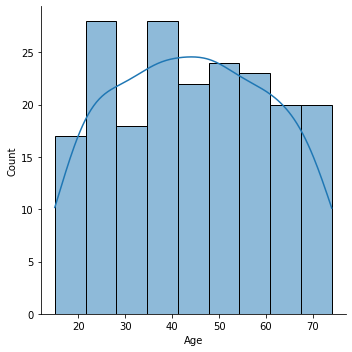

In [13]:
#let visualize the Age
sns.displot(df['Age'],kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<AxesSubplot:xlabel='Drug', ylabel='Age'>

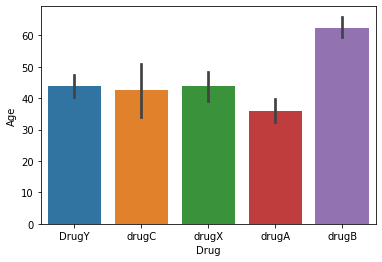

In [14]:
#How does age influence the type of drug people take
sns.barplot(x=df["Drug"],y=df["Age"])

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

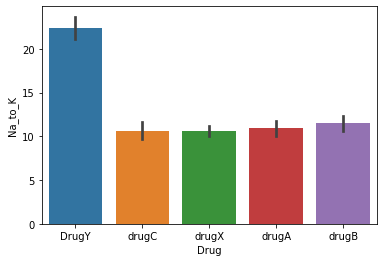

In [15]:
#Lets check how does sodium to potasium levels affeck kind of drug?
sns.barplot(x=df['Drug'],y=df['Na_to_K'])

<AxesSubplot:xlabel='Na_to_K', ylabel='Count'>

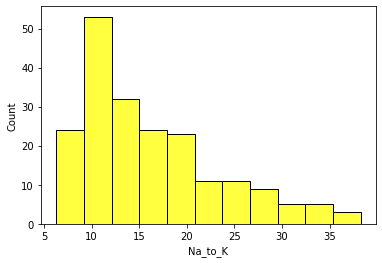

In [16]:
#lets evalute the distribution of Na_to_K
sns.histplot(df['Na_to_K'],color='yellow')

<AxesSubplot:xlabel='Age', ylabel='Na_to_K'>

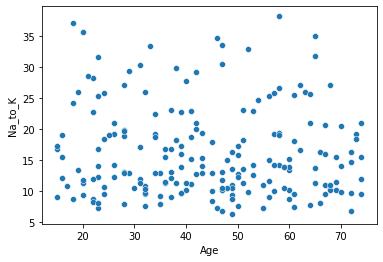

In [17]:
#how does age affect Na_to_K levels
sns.scatterplot(x=df['Age'],y=df['Na_to_K'])

In [18]:
#How does cholesterol levels relate with drugs
cholesterol_drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
cholesterol_drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


Text(0, 0.5, 'cholesterol')

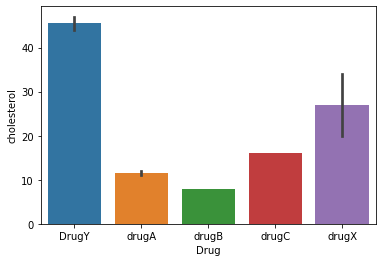

In [19]:
#lets visualise it
sns.barplot(x=cholesterol_drug['Drug'],y=cholesterol_drug['Count'])
plt.ylabel('cholesterol')

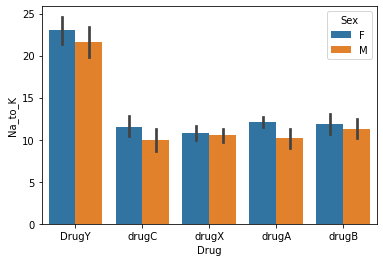

In [20]:
#how does gender and Na_to_K levels affect the kind of drug
ax = sns.barplot(x="Drug", y="Na_to_K", hue="Sex", data=df)

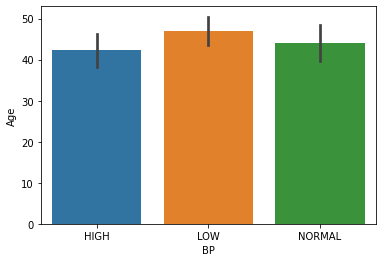

In [21]:
#how does age affects Bp the kind of drug
ax = sns.barplot(x="BP", y="Age",data=df)

In [22]:
#how many times people take each drug
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<AxesSubplot:ylabel='Drug'>

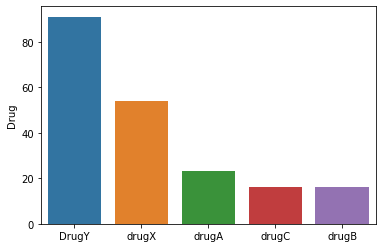

In [23]:
#lets visualise the counts
sns.barplot(x=df.Drug.value_counts().index,y=df.Drug.value_counts())

In [24]:
#lets add this new feature
df['na/ka>15'] = df['Na_to_K'].apply(lambda x: 1 if x>=15.015  else 0)

In [25]:
#converting Cholesterol into numeric
CH_mapping = {'HIGH':1,'NORMAL':0}
df['Cholesterol'] = df.Cholesterol.map(CH_mapping)

In [26]:
#converting BP into numeric
BP_mapping = {'HIGH':2,'LOW':0,'NORMAL':1}
df['BP']= df['BP'].map(BP_mapping)

In [27]:
#converting drugs into numeric
drug_mapping = {'DrugY':0,'drugC':2,'drugX':1,'drugA':3,'drugB':4}
df['Drug']=df.Drug.map(drug_mapping)

In [28]:
#lets convert other columns to numbers using get_dummies
df = pd.get_dummies(df,drop_first=True)

# FEATURE SELECTION AND SCALING

<AxesSubplot:>

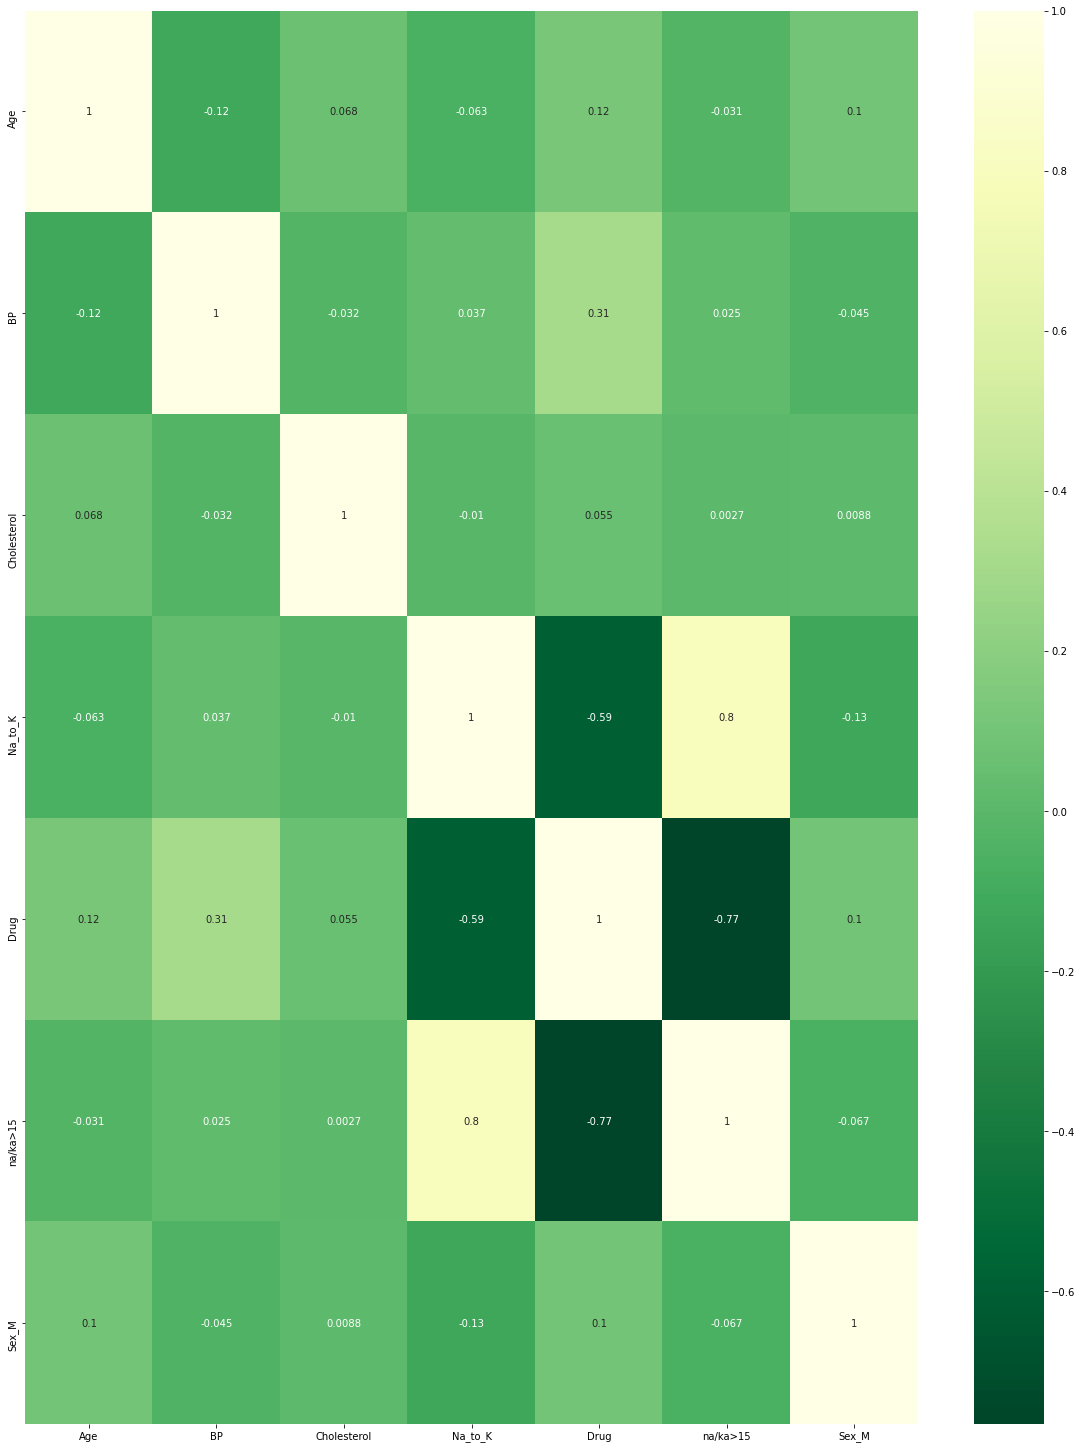

In [29]:
#lets to for correlation with target
matrix_corr = df.corr().index
plt.figure(figsize=(20,26))
sns.heatmap(df[matrix_corr].corr(),annot=True,cmap='YlGn_r')

In [30]:
#divide into independent and indepent variables
x = df[['Age', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'na/ka>15', 'Sex_M']]
y=df['Drug']

In [31]:
#splitting into training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [32]:
#scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# MODEL BUILDING

DECISION TREE MODEL

In [33]:
#set the decision tree
clf = tree.DecisionTreeClassifier(random_state=4)

In [34]:
#fit to training data
clf.fit(x_train_scaled,y_train)

DecisionTreeClassifier(random_state=4)

In [35]:
#predict the test data
y_pred_t = clf.predict(x_test_scaled)

In [36]:
print(accuracy_score(y_test,y_pred_t)*100,"% accuracy")

100.0 % accuracy


In [37]:
#evalute ur model
print(classification_report(y_test,y_pred_t))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



# RANDOM FOREST

In [38]:
#initialise the random forest object
clf = RandomForestClassifier(random_state=0)

In [39]:
#fit to train data
clf.fit(x_train_scaled,y_train)

RandomForestClassifier(random_state=0)

In [40]:
#predict the test
pred_rf = clf.predict(x_test_scaled)

In [41]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       0.88      1.00      0.93         7
           4       1.00      0.67      0.80         3

    accuracy                           0.98        60
   macro avg       0.97      0.93      0.95        60
weighted avg       0.99      0.98      0.98        60



In [42]:
#max features to consider 
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt']
# Maximum number of depth in trees
max_depth = [1,2,5, 10, 15, 20, 25, 30]
#min samples for splitting nodes
min_samples_split = [5, 10, 15, 20,25,60,100]
# Min samples for each leaf 
min_samples_leaf = [1, 2, 3,5, 12]

In [43]:
params_dict={
    "criterion":criterion,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}

In [44]:
model_grid = GridSearchCV(clf,param_grid=params_dict,verbose=2,n_jobs=-1,cv=3)

In [45]:
model_grid.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 1120 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed:  4.5min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 5, 12],
                         'min_samples_split': [5, 10, 15, 20, 25, 60, 100]},
             verbose=2)

In [46]:
pred_rf = model_grid.predict(x_test_scaled)

In [47]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       0.88      1.00      0.93         7
           4       1.00      0.67      0.80         3

    accuracy                           0.98        60
   macro avg       0.97      0.93      0.95        60
weighted avg       0.99      0.98      0.98        60



# NAIVE BAYES

In [48]:
#instantiate naive bayes
clf = GaussianNB()

In [49]:
#fit the model
clf.fit(x_train_scaled,y_train)

GaussianNB()

In [50]:
#predict the test data
y_pred_n  = clf.predict(x_test_scaled)

In [51]:
print(classification_report(y_test,y_pred_n))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



# CONCLUSION

DECISION TREE AND NAIVE BAYES GAVE ME 100% ACCURACY,BUT MY RANDOM FOREST GAVE 98% ACCURACY.